In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
datos_allPairs = pd.read_csv('resultados_allPairsShortestPath.csv')

datos_allPairs2 = pd.read_csv('resultados_allPairsShortestPath2.csv')


In [8]:
datos_allPairs

,Nodos,Aristas,Tiempo_Segundos
0,100,990,0.028278
1,100,990,0.027458
2,100,990,0.030768
3,100,990,0.028810
4,100,990,0.027060
...,...,...,...
70,500,24950,17.712736
71,500,24950,17.664659
72,500,24950,17.629928
73,500,24950,17.128880


In [17]:
datos_allPairs
datos_allPairs_prom =datos_allPairs.groupby('Nodos').mean().reset_index()
datos_allPairs_prom

,Nodos,Aristas,Tiempo_Segundos
0,100,990.0,0.027527
1,200,3980.0,0.341799
2,300,8970.0,2.215547
3,400,15960.0,7.045085
4,500,24950.0,17.372315


In [16]:
datos_allPairs2_prom =datos_allPairs2.groupby('Nodos').mean().reset_index()
datos_allPairs2_prom

,Nodos,Aristas,Tiempo_Segundos
0,100,990.0,0.004079
1,200,3980.0,0.026898
2,300,8970.0,0.084093
3,400,15960.0,0.238626
4,500,24950.0,0.454883


/tmp/ipykernel_7518/652715305.py:38: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


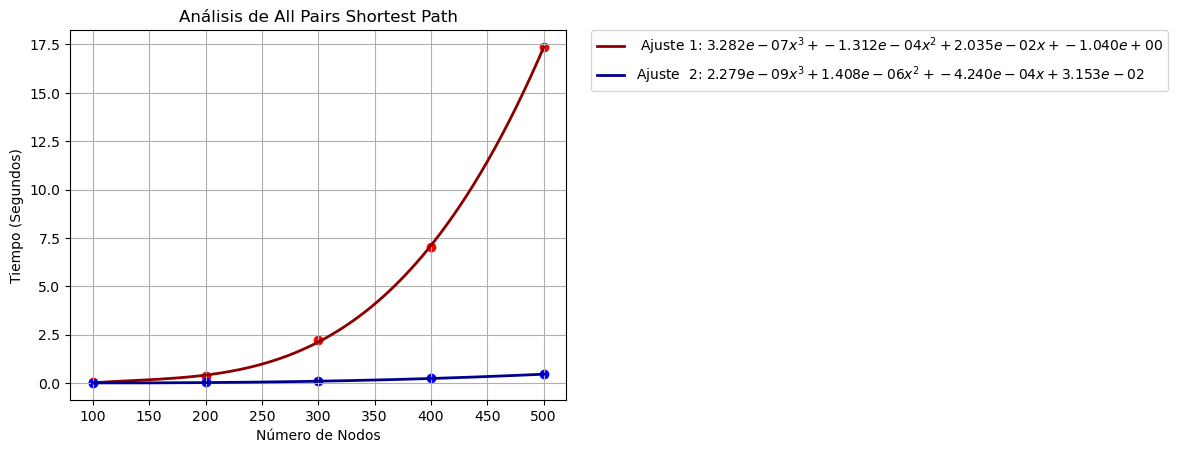

In [32]:
x1=datos_allPairs_prom['Nodos'].values
y1=datos_allPairs_prom['Tiempo_Segundos'].values

x2=datos_allPairs2_prom['Nodos'].values
y2=datos_allPairs2_prom['Tiempo_Segundos'].values


plt.scatter(x1, y1, color='red')
plt.scatter(x2, y2, color='blue')

coeficientes_cubicos1 = np.polyfit(x1, y1, 3)
coeficientes_cubicos2 = np.polyfit(x2, y2, 3)

funcion_cubica1 = np.poly1d(coeficientes_cubicos1)
funcion_cubica2 = np.poly1d(coeficientes_cubicos2)

x_curva = np.linspace(x1.min(), x1.max(), 500)

y1_curva = funcion_cubica1(x_curva)
y2_curva =funcion_cubica2(x_curva)

c1 = coeficientes_cubicos1
label_funcion1 = f' Ajuste 1: ${c1[0]:.3e}x^3 + {c1[1]:.3e}x^2 + {c1[2]:.3e}x + {c1[3]:.3e}$'

c2 = coeficientes_cubicos2
label_funcion2 = f'Ajuste  2: ${c2[0]:.3e}x^3 + {c2[1]:.3e}x^2 + {c2[2]:.3e}x + {c2[3]:.3e}$'


plt.plot(x_curva, y1_curva, color='darkred', linewidth=2, label=label_funcion1)

plt.plot(x_curva, y2_curva, color='darkblue', linewidth=2, label=label_funcion2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.title('Análisis de All Pairs Shortest Path')
plt.xlabel('Número de Nodos')
plt.ylabel('Tiempo (Segundos)')
plt.grid(True)
plt.tight_layout()
plt.show()